# ECON 220 - Data Science for Economists
## Week 6 - Handling IPUMS data
### Instructor: Jafet Baca-Obando

## Step 1. Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2. Load the data

**New technique**. Instead of finding the file path manually, we can ask the `os` package to do it for us. Just make sure that the file is in the same folder as your notebook.

In [2]:
# Find working directory
import os
path = os.getcwd()
print(path)

c:\Users\jbaca\OneDrive\Documents\2. Ph.D. in Economics\Courses\Semester 7 - Fall 2025\ECON 220 - Data Science for Economists - Lab\Lectures\Week 6


In [3]:
# Import data
data = pd.read_csv("ipums_2019.csv")

# First few rows
data.head(20)

# # Get the shape of the dataframe
# data.shape

,year,sex,age,marst,race,raced,hispan,hispand,speakeng,hcovany
0,2019,male,2,never married/single,white,white,not hispanic,not hispanic,n/a (blank),no health insurance coverage
1,2019,female,65,"married, spouse present",white,white,other,spaniard,"yes, speaks only english",with health insurance coverage
2,2019,male,66,"married, spouse present",white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
3,2019,female,60,"married, spouse present",chinese,chinese,not hispanic,not hispanic,does not speak english,with health insurance coverage
4,2019,female,58,widowed,black/african american,black/african american,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
5,2019,male,60,divorced,black/african american,black/african american,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
6,2019,male,66,"married, spouse present",white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
7,2019,male,83,"married, spouse present",white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
8,2019,female,11,never married/single,white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
9,2019,female,43,"married, spouse present",two major races,white and other asian race(s),not hispanic,not hispanic,"yes, speaks very well",with health insurance coverage


In [4]:
data['hcovany'].value_counts()

hcovany
with health insurance coverage    9212
no health insurance coverage       788
Name: count, dtype: int64

In [5]:
# Data's information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      10000 non-null  int64 
 1   sex       10000 non-null  object
 2   age       10000 non-null  object
 3   marst     10000 non-null  object
 4   race      10000 non-null  object
 5   raced     10000 non-null  object
 6   hispan    10000 non-null  object
 7   hispand   10000 non-null  object
 8   speakeng  10000 non-null  object
 9   hcovany   10000 non-null  object
dtypes: int64(1), object(9)
memory usage: 781.4+ KB


Notice that the column `age` is being read as an `object` (string) instead of an `int64` (integer). Let's identify the issue and fix it.

In [6]:
data['age'].value_counts()

age
66                           166
56                           160
55                           157
49                           153
62                           151
                            ... 
90 (90+ in 1980 and 1990)     15
95                            14
92                            11
93                            10
91                             5
Name: count, Length: 96, dtype: int64

The issue is that some individuals are recorded as "less than 1 year old" or "90 (90+ in 1980 and 1990)", which is not a number. We can replace these values with `0` and `90`, respectively, and then convert the column to integers.

In [7]:
data['age'] = data['age'].replace({'less than 1 year old': '0',
                                   '90 (90+ in 1980 and 1990)': '90'})

In [8]:
data['age'] = data['age'].astype(int)
data['age'].dtype

dtype('int32')

## Step 3. Identifying and creating dummy variables

Dummy (or dichotomous) variables are ubiquitous in data analysis. They are used to represent variables with two categories. 

### Example. Create a dummy variable `fem` that takes the value of `1` if the individual identifies as a female and `0` otherwise.

In [9]:
data.head(10)

,year,sex,age,marst,race,raced,hispan,hispand,speakeng,hcovany
0,2019,male,2,never married/single,white,white,not hispanic,not hispanic,n/a (blank),no health insurance coverage
1,2019,female,65,"married, spouse present",white,white,other,spaniard,"yes, speaks only english",with health insurance coverage
2,2019,male,66,"married, spouse present",white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
3,2019,female,60,"married, spouse present",chinese,chinese,not hispanic,not hispanic,does not speak english,with health insurance coverage
4,2019,female,58,widowed,black/african american,black/african american,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
5,2019,male,60,divorced,black/african american,black/african american,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
6,2019,male,66,"married, spouse present",white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
7,2019,male,83,"married, spouse present",white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
8,2019,female,11,never married/single,white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage
9,2019,female,43,"married, spouse present",two major races,white and other asian race(s),not hispanic,not hispanic,"yes, speaks very well",with health insurance coverage


In [10]:
data['sex'].value_counts()

sex
female    5137
male      4863
Name: count, dtype: int64

In [11]:
# Create "fem" variable: 1 if female, 0 if not
data['fem'] = data['sex'] == "female"
data['fem'].head(10)

# Convert to integer
data['fem'] = data['fem'].astype('int')
data[['sex', 'fem']] # Check

,sex,fem
0,male,0
1,female,1
2,male,0
3,female,1
4,female,1
...,...,...
9995,female,1
9996,female,1
9997,male,0
9998,male,0


### Example. Create a dummy variable `married` that takes the value of `1` if the individual is married and `0` otherwise. Don't forget to convert to integer!

In [12]:
data['marst'].value_counts()

marst
never married/single       4132
married, spouse present    4116
divorced                    947
widowed                     502
married, spouse absent      182
separated                   121
Name: count, dtype: int64

In [13]:
data['married'] = (data['marst'] == 'married, spouse present') | (data['marst'] == 'married, spouse absent')
data['married'] = data['married'].astype('int')
data[['marst', 'married']].head(10)

,marst,married
0,never married/single,0
1,"married, spouse present",1
2,"married, spouse present",1
3,"married, spouse present",1
4,widowed,0
5,divorced,0
6,"married, spouse present",1
7,"married, spouse present",1
8,never married/single,0
9,"married, spouse present",1


## Step 4. What if we want more categories?

Working with two categories is very restrictive. We can instead use **categorical variables**.

Categorical variables are variables that represent distinct groups or categories rather than numerical values. Examples include gender, marital status, or race.

These variables can be **nominal** (no natural order, e.g., colors) or **ordinal** (with a meaningful order, e.g., education level). 

In data analysis, categorical variables are often encoded as numbers or categories to facilitate statistical modeling and visualization (just like we did with dummy variables).

### Example. Create a column `english_level` that categorizes individuals based on their English proficiency (`speakeng`):

In [14]:
data.head(10)

,year,sex,age,marst,race,raced,hispan,hispand,speakeng,hcovany,fem,married
0,2019,male,2,never married/single,white,white,not hispanic,not hispanic,n/a (blank),no health insurance coverage,0,0
1,2019,female,65,"married, spouse present",white,white,other,spaniard,"yes, speaks only english",with health insurance coverage,1,1
2,2019,male,66,"married, spouse present",white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage,0,1
3,2019,female,60,"married, spouse present",chinese,chinese,not hispanic,not hispanic,does not speak english,with health insurance coverage,1,1
4,2019,female,58,widowed,black/african american,black/african american,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage,1,0
5,2019,male,60,divorced,black/african american,black/african american,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage,0,0
6,2019,male,66,"married, spouse present",white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage,0,1
7,2019,male,83,"married, spouse present",white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage,0,1
8,2019,female,11,never married/single,white,white,not hispanic,not hispanic,"yes, speaks only english",with health insurance coverage,1,0
9,2019,female,43,"married, spouse present",two major races,white and other asian race(s),not hispanic,not hispanic,"yes, speaks very well",with health insurance coverage,1,1


In [15]:
data['speakeng'].describe()
data['speakeng'].value_counts()

speakeng
yes, speaks only english    7770
yes, speaks very well       1100
n/a (blank)                  480
yes, speaks well             331
yes, but not well            219
does not speak english       100
Name: count, dtype: int64

In [16]:
# Create auxiliary function
def english_level(column):
    if (column == 'does not speak english') | (column == 'n/a (blank)'):
        return 0
    elif column == 'yes, but not well':
        return 1
    elif column == 'yes, speaks well':
        return 2
    elif column == 'yes, speaks very well':
        return 3
    elif column == 'yes, speaks only english':
        return 4

# Implement function
data['english_level'] = data['speakeng'].apply(english_level)
data[['speakeng', 'english_level']].head(10)

,speakeng,english_level
0,n/a (blank),0
1,"yes, speaks only english",4
2,"yes, speaks only english",4
3,does not speak english,0
4,"yes, speaks only english",4
5,"yes, speaks only english",4
6,"yes, speaks only english",4
7,"yes, speaks only english",4
8,"yes, speaks only english",4
9,"yes, speaks very well",3


### Example. Creating age groups

In [17]:
data['age'].describe()

count    10000.000000
mean        42.043400
std         23.719367
min          0.000000
25%         22.000000
50%         43.000000
75%         62.000000
max         95.000000
Name: age, dtype: float64

In [18]:
# Split sample into 3 categories by age
group = ['young', 'middle', 'senior']
limit = [0, 18, 65, 100]
data['age_cat'] = pd.cut(data['age'], bins=limit, labels=group, right=False) # right=false to exclude the right boundary
data['age_cat'].value_counts(sort=False)

age_cat
young     1984
middle    5920
senior    2096
Name: count, dtype: int64

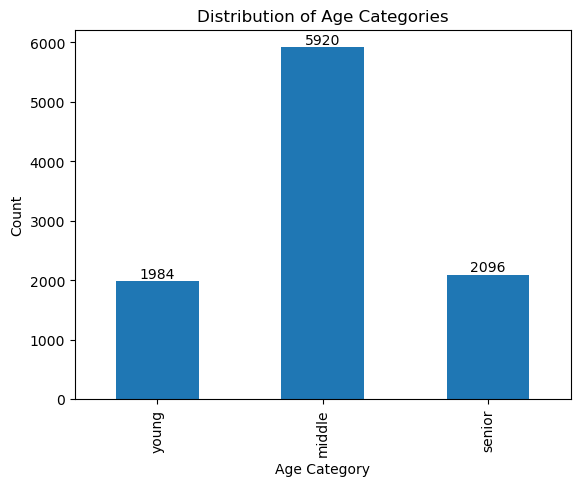

In [27]:
ax = data['age_cat'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.bar_label(ax.containers[0])
plt.show()

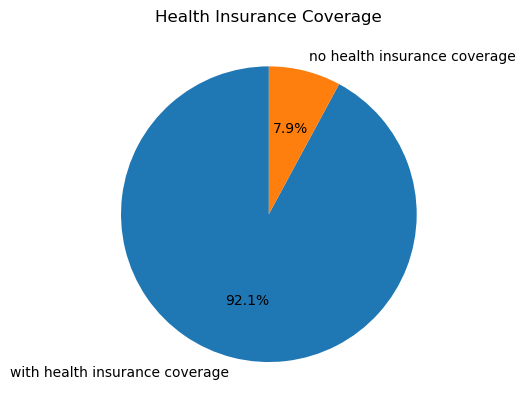

In [19]:
data['hcovany'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ylabel='', title='Health Insurance Coverage')
plt.show()

In [20]:
data['hcovany'].value_counts()

hcovany
with health insurance coverage    9212
no health insurance coverage       788
Name: count, dtype: int64

In [ ]:
!jupyter nbconvert --to html "Week 6. Handling IPUMS data.ipynb".ipynb